<a href="https://colab.research.google.com/github/Daryna-Ruban/Machine-learning/blob/main/%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%9B%D0%915_24_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 5.
Метод ліктя. Кластеризація даних.

# Завдання 1
Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.
Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
Візуалізувати кластери.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [7]:
iris = load_iris()
x = iris.data

pd.DataFrame(x, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


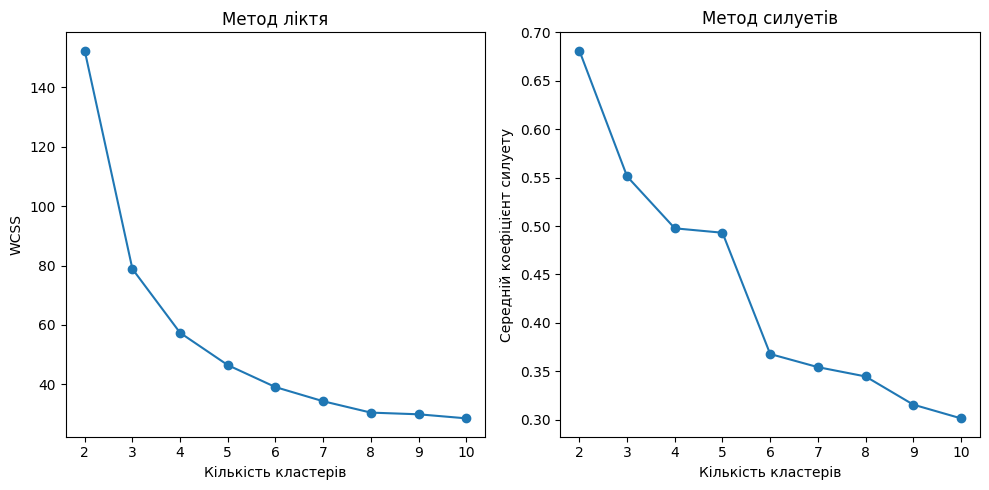

In [10]:
X = iris.data

# Визначаємо кількість кластерів для перевірки
cluster_range = range(2, 11)

# Зберігаємо значення
wcss = []
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Фітимо дані X

    wcss.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Метод ліктя: візуалізація
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')

# Метод силуетів: візуалізація
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуету')

plt.tight_layout()
plt.show()

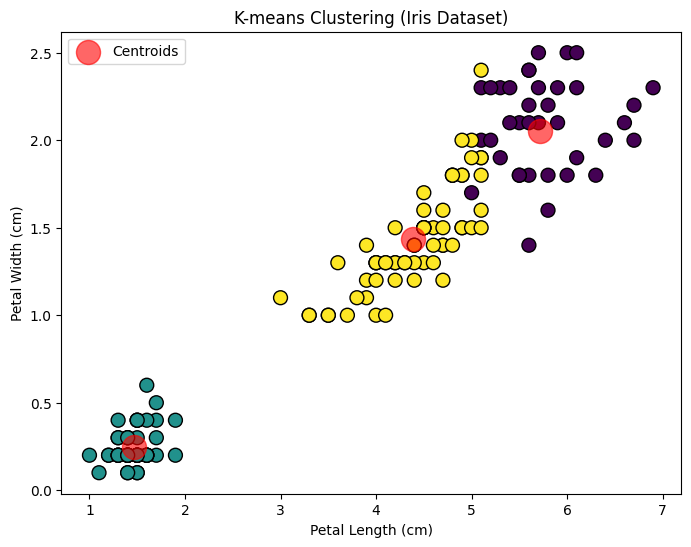

In [11]:
X = iris.data

# Використовуємо K-means для кластеризації
kmeans = KMeans(n_clusters=3, random_state=42)  # Приклад для 3 кластерів
kmeans.fit(X)
labels = kmeans.labels_  # Отримуємо лейбли кластерів

# Візуалізація кластера за двома характеристиками (довжина і ширина пелюстки)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)

# Додаємо центроїди
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=300, alpha=0.6, label='Centroids')

plt.title("K-means Clustering (Iris Dataset)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()

У ході цієї лабораторної роботи було виконано завантаження датасету "Ірис" і проведено аналіз для визначення найкращої кількості кластерів. Для цього використовували метод ліктя та силуетів, які допомогли ідентифікувати оптимальну кількість кластерів — 3. Візуалізація дозволила наочно побачити, як дані розподіляються по трьох кластерах, що були визначені алгоритмом кластеризації.

# Завдання 2.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from tabulate import tabulate
from sklearn.svm import SVC
from google.colab import files
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

Завантажити датасет Student_data.csv (датасет з Kaggle)

In [14]:
data = files.upload()
df = pd.read_csv(next(iter(data)))

Saving Student_data.csv to Student_data.csv


Роздрукувати перші 5 рядків.
Вивести розмір датасета, типи даних.
Перевірити на пропущені значення. При наявності замінити на середнє за
стовпцем

In [19]:
# Виведення перших 5 рядків
print("Перші 5 рядків датасету:")
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

# Виведення розміру датасету (кількість рядків і стовпців)
print("\nРозмір датасету:")
print(df.shape)

# Виведення типів даних
print("\nТипи даних у кожному стовпці:")
print(tabulate(df.dtypes.reset_index(), headers=['Column', 'Data Type'], tablefmt='pretty'))

# Перевірка на пропущені значення
print("\nКількість пропущених значень у кожному стовпці:")
print(tabulate(df.isnull().sum().reset_index(), headers=['Column', 'Missing Values'], tablefmt='pretty'))

# Замінюємо пропущені значення на середні значення за стовпцем
df.fillna(df.mean(), inplace=True)

# Перевіряємо, чи залишилися пропущені значення після заміни
print("\nПеревірка після заміни пропущених значень:")
print(tabulate(df.isnull().sum().reset_index(), headers=['Column', 'Missing Values'], tablefmt='pretty'))

Перші 5 рядків датасету:
+---+-----------+------+--------+-----------+-------------------+--------------------+----------+----------+-----------------+-----------------+--------+-------+--------------+--------------------+------------+
|   | StudentID | Age  | Gender | Ethnicity | ParentalEducation |  StudyTimeWeekly   | Absences | Tutoring | ParentalSupport | Extracurricular | Sports | Music | Volunteering |        GPA         | GradeClass |
+---+-----------+------+--------+-----------+-------------------+--------------------+----------+----------+-----------------+-----------------+--------+-------+--------------+--------------------+------------+
| 0 |  1001.0   | 17.0 |  1.0   |    0.0    |        2.0        | 19.833722807854716 |   7.0    |   1.0    |       2.0       |       0.0       |  0.0   |  1.0  |     0.0      | 2.929195591667681  |    2.0     |
| 1 |  1002.0   | 18.0 |  0.0   |    0.0    |        1.0        | 15.40875605584674  |   0.0    |   0.0    |       1.0       |     

Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.
Визначити, яку задачу розв’язуємо (регресія чи класифікація).

In [20]:
# Перевірка на дублікати
duplicates = df.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

# Видалення дублікатів
df.drop_duplicates(inplace=True)
print(f"Кількість дублікатів після видалення: {df.duplicated().sum()}")

# Виведення описової статистики
print("\nОписова статистика:")
print(tabulate(df.describe(), headers='keys', tablefmt='pretty'))

# Визначення задачі (регресія чи класифікація)
# Припустимо, що останній стовпець є цільовим
target_column = df.columns[-1]
target_type = df[target_column].dtype

if pd.api.types.is_numeric_dtype(target_type):
    task_type = "Регресія"
else:
    task_type = "Класифікація"

print(f"\nЗадача розв'язується: {task_type}")


Кількість дублікатів: 0
Кількість дублікатів після видалення: 0

Описова статистика:
+-------+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+-------------------+---------------------+--------------------+--------------------+---------------------+---------------------+---------------------+--------------------+--------------------+
|       |     StudentID     |        Age         |       Gender        |     Ethnicity      | ParentalEducation  |  StudyTimeWeekly   |     Absences      |      Tutoring       |  ParentalSupport   |  Extracurricular   |       Sports        |        Music        |    Volunteering     |        GPA         |     GradeClass     |
+-------+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+-------------------+---------------------+--------------------+--------------------+---------------------+-----------------

Побудувати 3
моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.
Оцінити моделі.

In [22]:
X = df.drop(['GradeClass'], axis=1)
y = df['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Логістична регресія
logreg = LogisticRegression(max_iter=1000)
logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

logreg_grid = GridSearchCV(logreg, logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_

# Дерево рішень
tree = DecisionTreeClassifier(random_state=42)
tree_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

tree_grid = GridSearchCV(tree, tree_params, cv=5)
tree_grid.fit(X_train, y_train)
tree_best = tree_grid.best_estimator_

# SVM
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

# Оцінка моделей
models = {'Logistic Regression': logreg_best, 'Decision Tree': tree_best, 'SVM': svm_best}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7284
Decision Tree Accuracy: 0.9248
SVM Accuracy: 0.8482


Визначити методом ліктя і силуєтів оптимальну кількість кластерів.

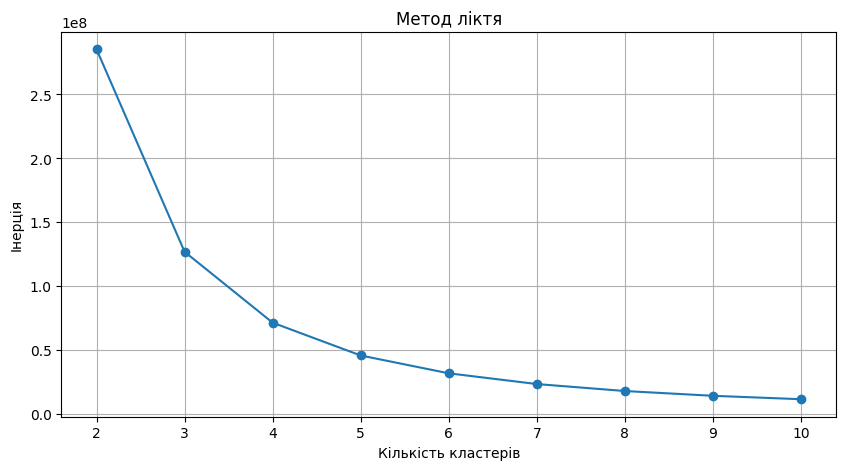

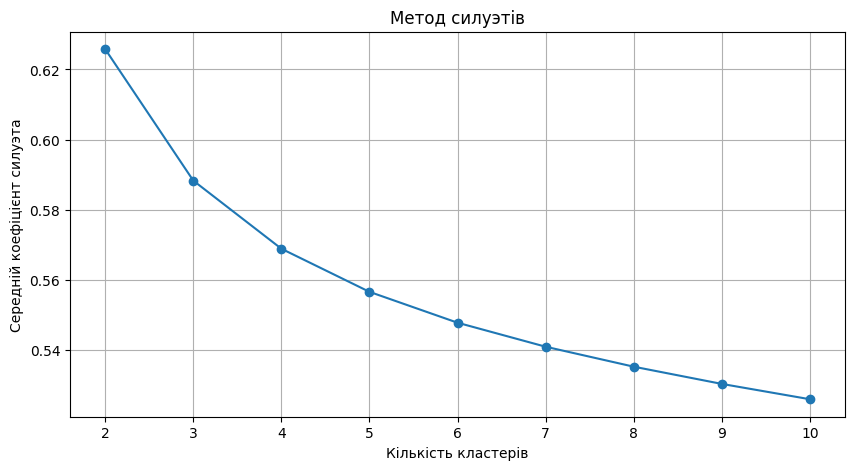

In [24]:
X = df.drop(['GradeClass'], axis=1)

# Метод ліктя
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Побудова графіка методу ліктя
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.xticks(k_range)
plt.grid()
plt.show()

# Метод силуэтів
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Побудова графіка методу силуетів
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Метод силуэтів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуэта')
plt.xticks(k_range)
plt.grid()
plt.show()

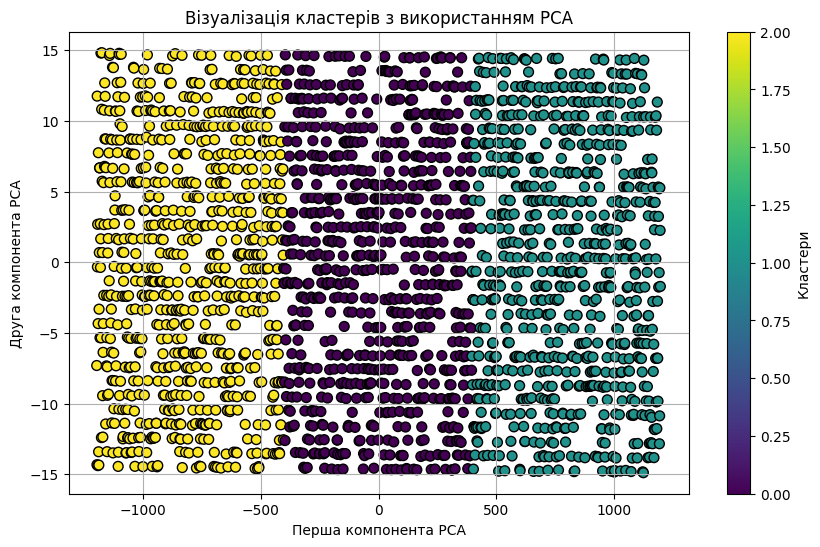

In [27]:
X = df.drop(['GradeClass'], axis=1)

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Візуалізація кластерів з використанням PCA')
plt.xlabel('Перша компонента PCA')
plt.ylabel('Друга компонента PCA')
plt.colorbar(label='Кластери')
plt.grid()
plt.show()

У результаті аналізу датасету Student_data.csv проведено очистку даних шляхом видалення дублікатів, виведено описову статистику та побудовано три моделі для прогнозування оцінок, які були оцінені на точність.

Згідно з результатами обох методів, найбільш ймовірна оптимальна кількість кластерів становить 3. Це підтверджується різким зменшенням інерції при переході до 3 кластерів та помірним середнім коефіцієнтом силуэта.